# **Diabetes Dataset: Data Science Tutorial for Beginners🍩📊**



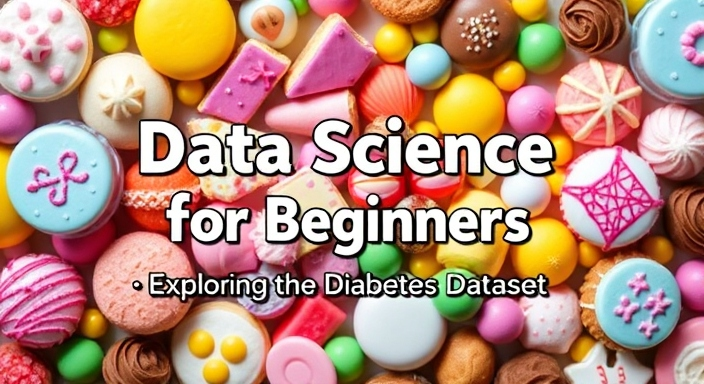

👋 Welcome to this beginner-friendly tutorial on exploring the Diabetes dataset! 🎉 Whether you're a business administration major or simply interested in data analysis, this notebook is designed for you. In this tutorial, we’ll dive into data analysis and visualization techniques without getting too deep into machine learning or AI model training. 🚀 If you're curious about machine learning later on, I’d be happy to create additional tutorials for you. Let’s get started on our journey into the world of data science! 📊

## **Download Dataset**

**Setting Up and Downloading the Dataset with Kaggle API**

Please upload the 'kaggle.json' file to the current directory before we begin.

Here is a link to youtube tutorial on how you can do this: https://youtu.be/57N1g8k2Hwc?si=I_Ttg8NENAHUxnKw
@ShriramVasudevan

In [ ]:
# Install kaggle
!pip install kaggle

In [ ]:
# Configure path of kaggle.json
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# Api to fetch the dataset
! kaggle datasets download -d hasibur013/diabetes-dataset

Dataset URL: https://www.kaggle.com/datasets/hasibur013/diabetes-dataset
License(s): MIT
diabetes-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# Extracting dataset zip
from zipfile import ZipFile
dataset = '/content/diabetes-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted.')

The dataset is extracted.


A .csv file named 'diabetes-dataset.csv' will be shown at the current directory. This is the dataset we are gonna use.

## **Loading Dataset**

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes_dataset.csv', encoding='utf-8')
# Display the first few rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Descriptions on Dataset Columns:**

**Pregnancies**:
Number of times the patient has been pregnant.

**Glucose**:
Plasma glucose concentration after a 2-hour oral glucose tolerance test.

**BloodPressure**:
Diastolic blood pressure (mm Hg).

**SkinThickness**:
Triceps skinfold thickness (mm).

**Insulin**:
2-hour serum insulin (mu U/ml).

**BMI**:
Body mass index (weight in kg/(height in m)^2).

**DiabetesPedigreeFunction**:
A function that represents the patient’s diabetes pedigree (i.e., likelihood of diabetes based on family history).

**Age**:
Age of the patient (years).

**Outcome**:
Binary outcome (0 or 1) where 1 indicates the presence of diabetes and 0 indicates the absence.

source: https://www.kaggle.com/datasets/hasibur013/diabetes-dataset/data

In [ ]:
# Display basic information about the dataset
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


From the output above, we get to know this dataset consists of **9 columns** and **768 rows**. All of the data types are **numeric**, some of them are int64 and some are float 64.

**int64:** This represents a 64-bit integer. It can store whole numbers (positive and negative) without any decimal component. The range for int64 is from -2^63 to 2^63-1.

**float64:** This represents a 64-bit floating-point number. It can store real numbers (including decimals) and is typically used for continuous data. The range for float64 is much larger than that of int64, but it is subject to precision limitations when representing very large or very small numbers.

## **Data Cleaning: Missing Values**
 Missing values can lead to inaccurate analyses and predictions, so it's essential to identify and handle them appropriately.


In [ ]:
# Check if there are missing values
missing_values = data.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Seems like there are no missing values from the output above.

BUT!

In medical datasets, **0 as values in certain columns may indicate missing or unrecorded data** rather than an actual measurement. In the case of the Diabetes dataset, values of 0 for columns like 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', and 'BMI' are biologically implausible and should be treated as missing data.

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In this datset, only 'Pregnancies', 'DiabetesPedigreeFunction', 'Age' and 'Outcome' columns can remain values of 0s.


In [ ]:
import numpy as np  # Linear algebra
from tabulate import tabulate  # This makes the printed tables more aesthetically pleasing

# Replace 0s with NaN for specific columns directly in the 'data' DataFrame
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)

# Check missing values
missing_values = data.isnull().sum()

# Display missing values with tabulate
print("\nMissing Values:\n", tabulate(missing_values.reset_index(name="Missing Values"), headers=["Feature", "Missing Values"], tablefmt="pretty"))



Missing Values:
 +---+--------------------------+----------------+
|   |         Feature          | Missing Values |
+---+--------------------------+----------------+
| 0 |       Pregnancies        |       0        |
| 1 |         Glucose          |       5        |
| 2 |      BloodPressure       |       35       |
| 3 |      SkinThickness       |      227       |
| 4 |         Insulin          |      374       |
| 5 |           BMI            |       11       |
| 6 | DiabetesPedigreeFunction |       0        |
| 7 |           Age            |       0        |
| 8 |         Outcome          |       0        |
+---+--------------------------+----------------+


**There are missing values!**

We can normally just **drop** them or replace with **mean** or **median** values.

Here I will replace all missing values with the median value from each column.

In [ ]:
# Replace missing values with the median
data.fillna(data.median(), inplace=True)

In [ ]:
# Check for missing values again
# Replace 0s with NaN for specific columns directly in the 'data' DataFrame
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[cols_to_replace] = data[cols_to_replace].replace(0, np.nan)

# Check missing values
missing_values = data.isnull().sum()

# Display missing values with tabulate
print("\nMissing Values:\n", tabulate(missing_values.reset_index(name="Missing Values"), headers=["Feature", "Missing Values"], tablefmt="pretty"))



Missing Values:
 +---+--------------------------+----------------+
|   |         Feature          | Missing Values |
+---+--------------------------+----------------+
| 0 |       Pregnancies        |       0        |
| 1 |         Glucose          |       0        |
| 2 |      BloodPressure       |       0        |
| 3 |      SkinThickness       |       0        |
| 4 |         Insulin          |       0        |
| 5 |           BMI            |       0        |
| 6 | DiabetesPedigreeFunction |       0        |
| 7 |           Age            |       0        |
| 8 |         Outcome          |       0        |
+---+--------------------------+----------------+


This time all missing values are handled.

## **Data Analaysis and Visualization**

In [ ]:
# Generate summary statistics for the dataset
summary = data.describe()

print("\nSummary Statistics:\n", tabulate(summary.transpose(), headers=["column Names","count","mean","std","min","25%","50%","75%","max"], tablefmt="pretty"))


Summary Statistics:
 +--------------------------+-------+---------------------+---------------------+-------+---------+--------+---------+-------+
|       column Names       | count |        mean         |         std         |  min  |   25%   |  50%   |   75%   |  max  |
+--------------------------+-------+---------------------+---------------------+-------+---------+--------+---------+-------+
|       Pregnancies        | 768.0 | 3.8450520833333335  | 3.3695780626988623  |  0.0  |   1.0   |  3.0   |   6.0   | 17.0  |
|         Glucose          | 768.0 |      121.65625      |  30.43828582241517  | 44.0  |  99.75  | 117.0  | 140.25  | 199.0 |
|      BloodPressure       | 768.0 |     72.38671875     | 12.096641733978139  | 24.0  |  64.0   |  72.0  |  80.0   | 122.0 |
|      SkinThickness       | 768.0 | 29.108072916666668  |  8.791221023089737  |  7.0  |  25.0   |  29.0  |  32.0   | 99.0  |
|         Insulin          | 768.0 |     140.671875      |   86.383059693181   | 14.0  |  121.5 

In [ ]:
# Outcome ditribution
outcome_distribution = data['Outcome'].value_counts()

print("\nOutcome Distribution:\n", tabulate(outcome_distribution.reset_index(), headers=["Outcome", "Count"], tablefmt="pretty"))


Outcome Distribution:
 +---+---------+-------+
|   | Outcome | Count |
+---+---------+-------+
| 0 |    0    |  500  |
| 1 |    1    |  268  |
+---+---------+-------+


**Visualize Distribution of Each Feature**

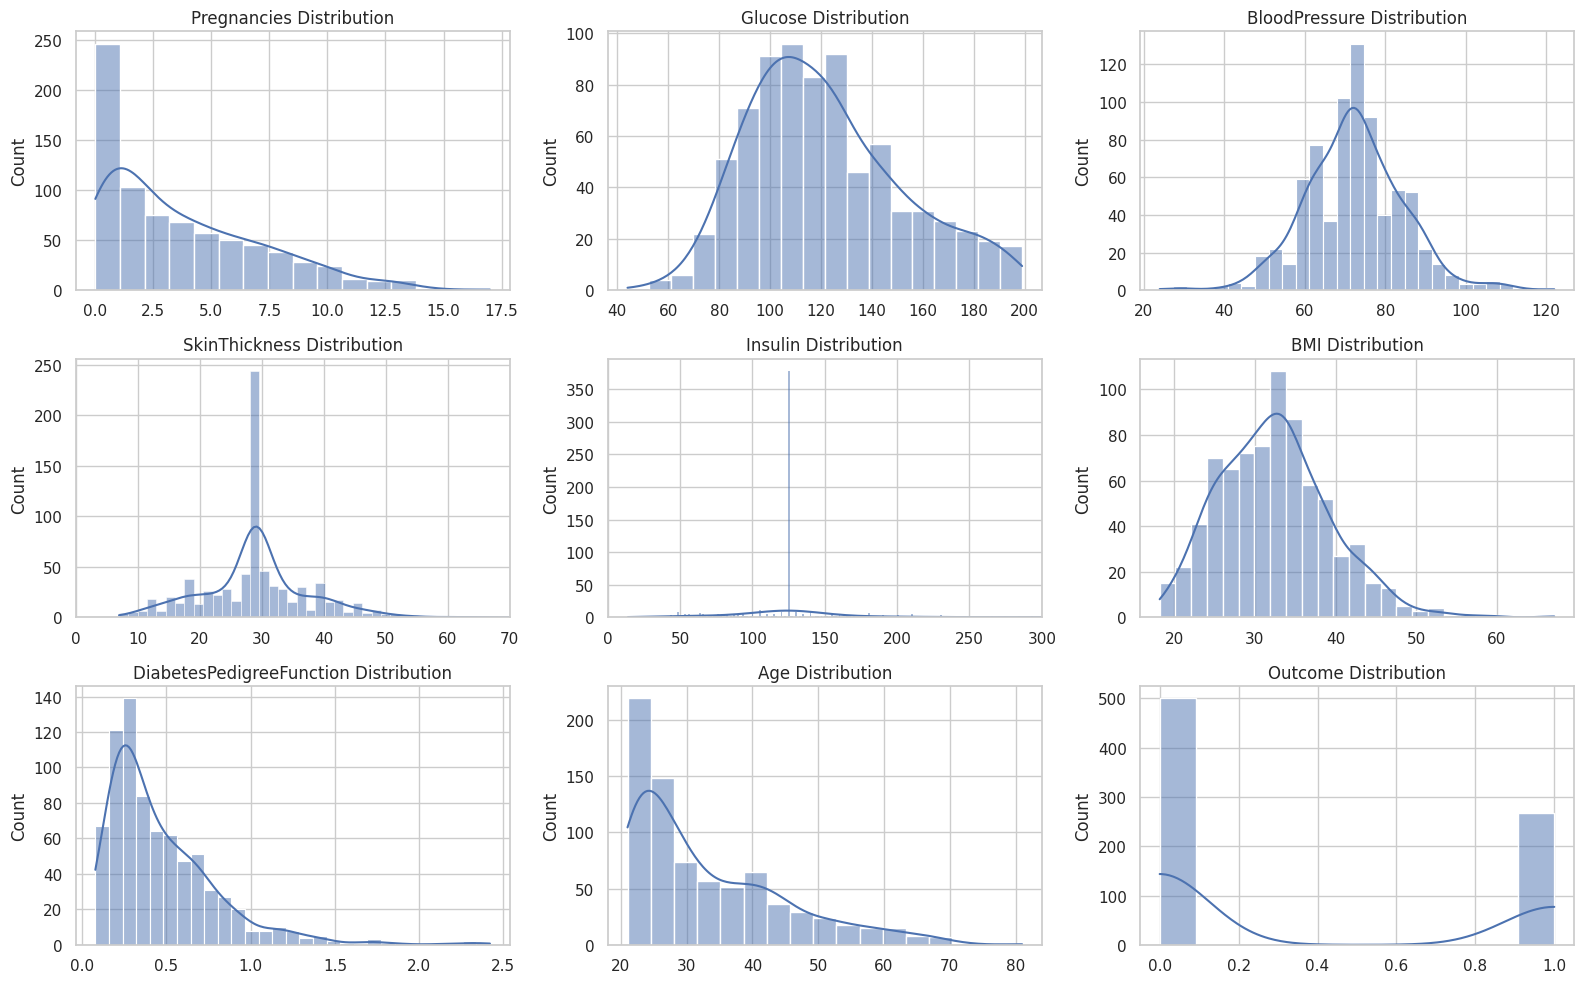

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size and style for a clean display
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Define axis limits for selected columns based on plausible ranges
axis_limits = {
    'SkinThickness': (0, 70),
    'Insulin': (0, 300)
}

# Plotting histograms for each feature
for i, column in enumerate(data.columns, 1):  # Exclude 'Outcome' column
    plt.subplot(3, 3, i)
    sns.histplot(data[column].dropna(), kde=True)  # kde=True for distribution curve

    # Apply axis limits for specific columns
    if column in axis_limits:
        plt.xlim(axis_limits[column])

    plt.title(f'{column} Distribution')
    plt.xlabel('')

plt.tight_layout()
plt.show()


<ipython-input-125-574e0e08b285>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Outcome', data=data, palette="viridis")


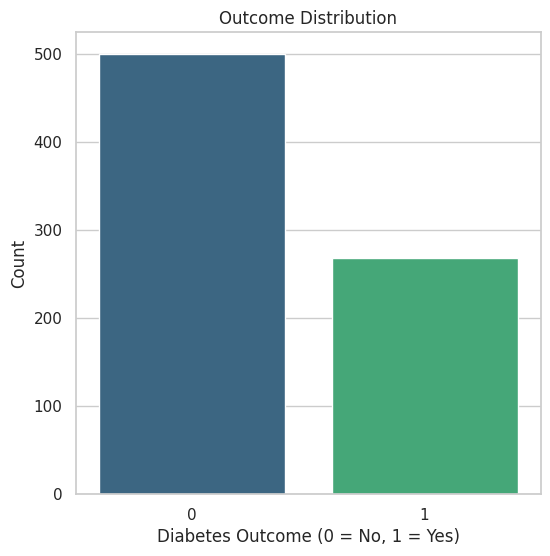

In [ ]:
# Plotting the distribution of the Outcome column
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")

sns.countplot(x='Outcome', data=data, palette="viridis")
plt.title("Outcome Distribution")
plt.xlabel("Diabetes Outcome (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


**Analyze Feature Correlation with Outcome**

Analyzing feature correlation with the Outcome variable is a great way to identify which features might have a stronger relationship with diabetes. The correlation matrix will show how each feature correlates with Outcome and with each other, giving insight into feature importance and multicollinearity (when two or more features are highly correlated).

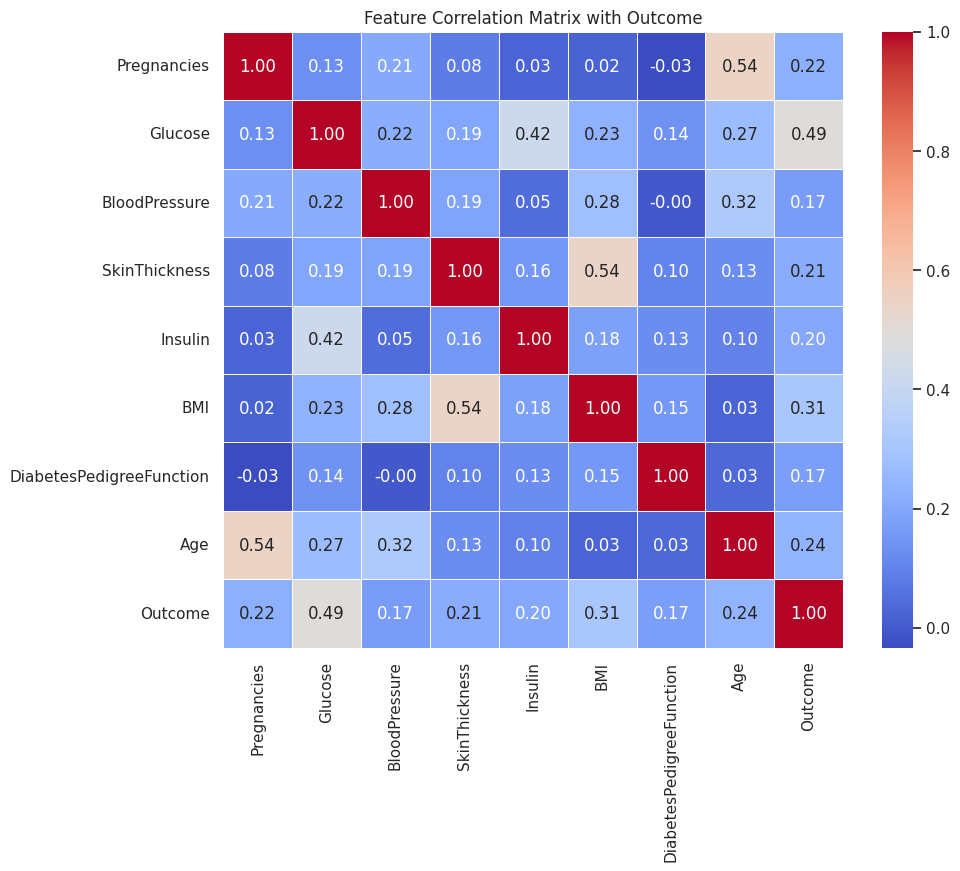

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()

# Displaying heatmap with emphasis on Outcome correlation
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix with Outcome")
plt.show()


**Outlier Detection**

Outlier detection can help improve model accuracy by identifying and potentially treating extreme values that may distort analysis and model predictions. We can use boxplots and z-scores to detect these outliers.

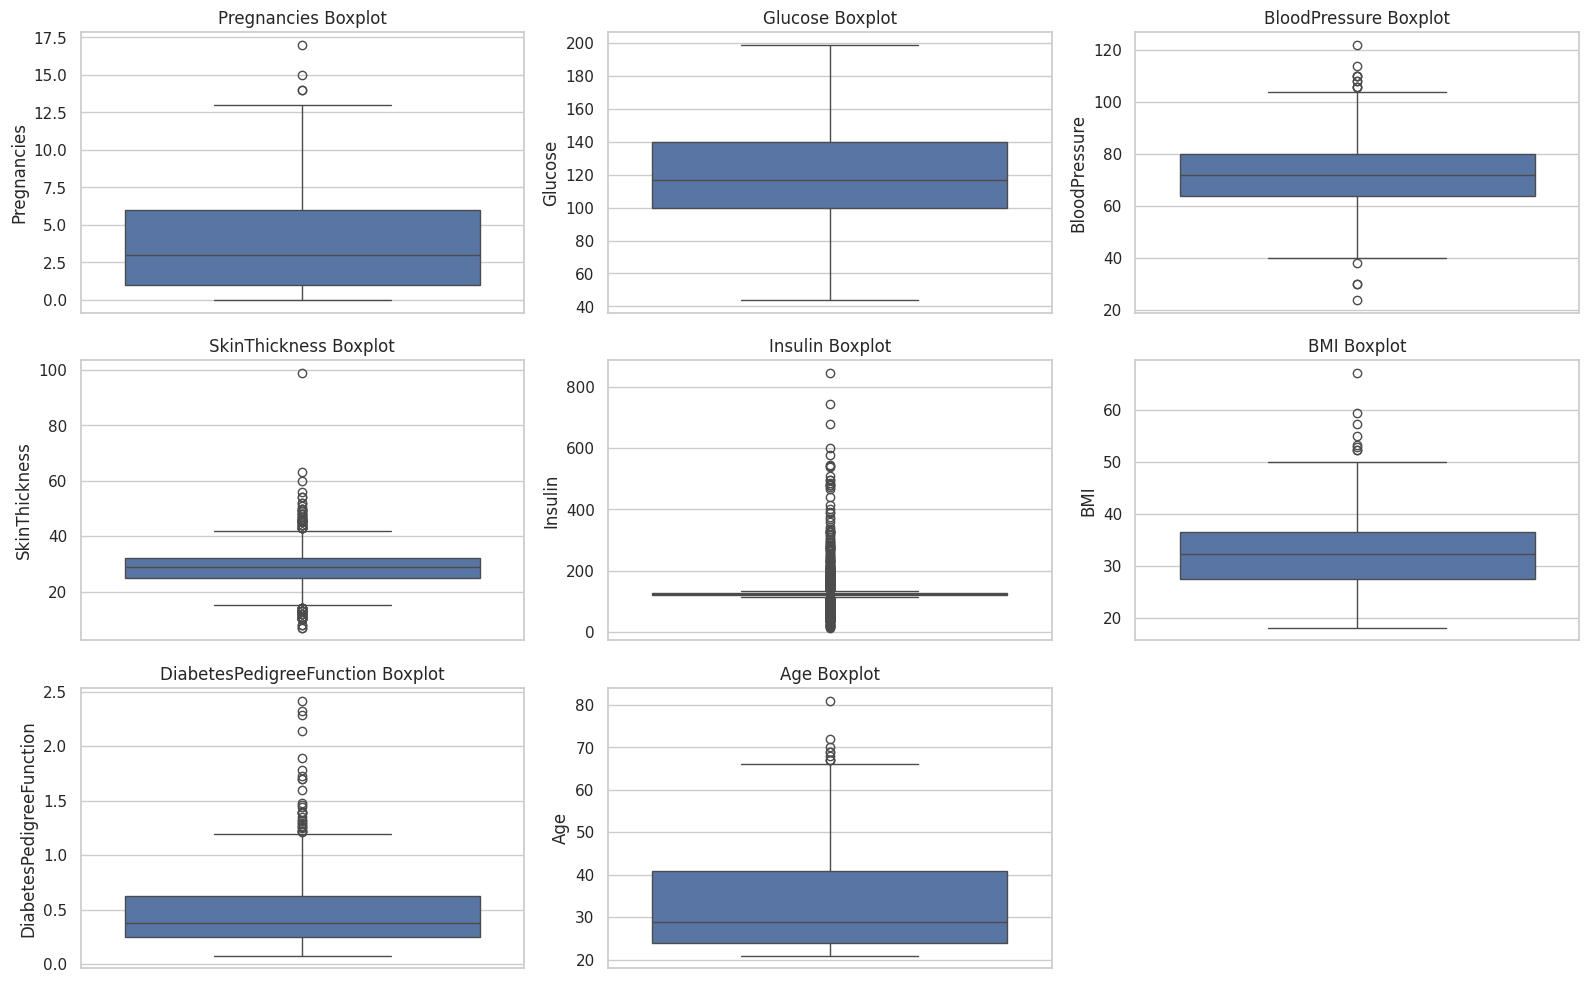

In [ ]:
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Plotting boxplots for each feature except 'Outcome'
for i, column in enumerate(data.columns[:-1], 1):  # Exclude 'Outcome' column
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f'{column} Boxplot')

plt.tight_layout()
plt.show()


In [ ]:
# Quantitative Outlier Detection with Z-Scores
from scipy.stats import zscore

# Calculate Z-scores for each feature
z_scores = data.drop(columns=['Outcome']).apply(zscore)

# Identify outliers where |Z| > 3
outliers = (z_scores.abs() > 3).sum()

# Display outlier counts for each feature
print("Outlier Counts:\n", outliers)


Outlier Counts:
 Pregnancies                  4
Glucose                      0
BloodPressure                8
SkinThickness                4
Insulin                     20
BMI                          5
DiabetesPedigreeFunction    11
Age                          5
dtype: int64


A high Z-score (e.g., |Z| > 3) typically indicates an outlier.



**Outcome Imbalance Check**

It’s essential to check if the classes are balanced, as imbalance can affect model performance.

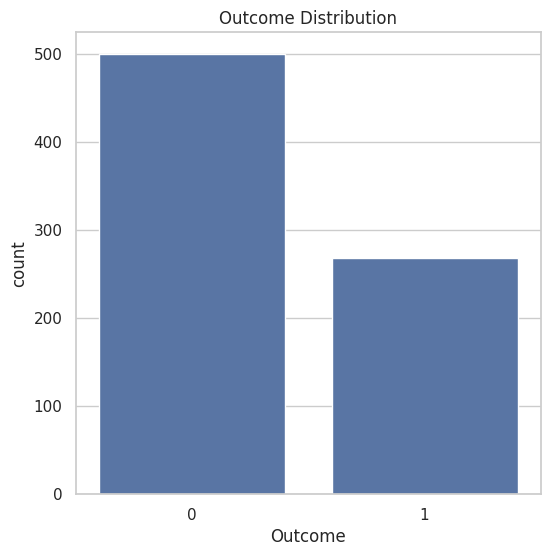

In [ ]:
plt.figure(figsize=(6, 6))
sns.countplot(x='Outcome', data=data)
plt.title("Outcome Distribution")
plt.show()

... 😥 Bit of imbalanced

## **Feature Engineering**

Feature engineering is the process of transforming raw data into meaningful features that enhance model performance.

This step is crucial because:

**1. Improves Accuracy:**
Well-engineered features can significantly boost model predictive power.

**2. Reduces Complexity:** Simplifying data representation helps models learn better.
Enhances Interpretability: Better features make it easier to understand model decisions.

**Note**: Feauture engineering usually requires some domian knowledges, because it involves utilizing insights about the specific context and nature of the data to create meaningful features that enhance the performance of machine learning models

***Following are the new features we will be creating for this dataset:***

**Age Groups:** Group ages into categories (like Young, Middle-aged, Senior) for simplicity.

In [ ]:
data['AgeGroup'] = pd.cut(data['Age'],
                          bins=[20, 30, 40, 50, 60, 70, 80],
                          labels=['Young Adult', '30s', '40s', '50s', '60s', 'Senior'])

**Glucose Levels:** Diabetes diagnosis often relies on blood glucose levels, so we could create a categorical feature for ranges of glucose levels (like Normal, Prediabetes, Diabetic).

In [ ]:
data['GlucoseLevel'] = pd.cut(data['Glucose'],
                              bins=[0, 140, 199, 300],
                              labels=['Normal', 'Prediabetes', 'Diabetes'])


**BMI Categories:** BMI ranges (like Underweight, Normal, Overweight, Obese) can add interpretability.

In [ ]:
data['BMICategory'] = pd.cut(data['BMI'],
                             bins=[0, 18.5, 24.9, 29.9, 50],
                             labels=['Underweight', 'Normal', 'Overweight', 'Obese'])


In [ ]:
# Show the output with the new features
print("\nData after Feature Engineering:\n")
data.head()


Data after Feature Engineering:



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,GlucoseLevel,BMICategory
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,40s,Prediabetes,Obese
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,30s,Normal,Overweight
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,30s,Prediabetes,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Young Adult,Normal,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,30s,Normal,Obese


## **Data Preprocessing**

**Encoding Categorical Variables:**

 Convert categorical features into numerical representations using techniques like one-hot encoding or label encoding.

In [ ]:
# One-hot encoding for AgeGroup, GlucoseLevel, and BMICategory
data = pd.get_dummies(data, columns=['AgeGroup', 'GlucoseLevel', 'BMICategory'], drop_first=True)


**Feature Scaling:**

Scale your numerical features to bring them to a similar range, which is especially important for algorithms sensitive to feature scales (e.g., KNN, SVM).

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


In [ ]:
# Show the output with data preprocessing
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup_30s,AgeGroup_40s,AgeGroup_50s,AgeGroup_60s,AgeGroup_Senior,GlucoseLevel_Prediabetes,GlucoseLevel_Diabetes,BMICategory_Normal,BMICategory_Overweight,BMICategory_Obese
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1,False,True,False,False,False,True,False,False,False,True
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0,True,False,False,False,False,False,False,False,True,False
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1,True,False,False,False,False,True,False,True,False,False
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0,False,False,False,False,False,False,False,False,True,False
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1,True,False,False,False,False,False,False,False,False,True


**Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']                 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% for training and 20% for testing


## **Model Training**

Based on the nature of the problem (classification), select one or more algorithms to try out (e.g., Logistic Regression, Decision Trees, Random Forests, SVM).

**Here, we will be using Random Forests.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)


In [ ]:
# Training
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Make Predictions
y_pred = model.predict(X_test)


In [ ]:
# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[81 18]
 [18 37]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        99
           1       0.67      0.67      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



The overall accuracy of the model is 0.77 (77%). This means that 77% of the predictions made by the model are correct.

In [ ]:
import pandas as pd

# Define new test cases with names
new_data = pd.DataFrame({
    "Name": ["Alice Johnson", "Bob Smith", "Chloe Brown", "Daniel Lee", "Eva Chen"],
    "Pregnancies": [2, 5, 0, 3, 4],
    "Glucose": [85, 180, 120, 95, 160],
    "BloodPressure": [65, 90, 80, 75, 70],
    "SkinThickness": [20, 40, 0, 30, 35],
    "Insulin": [0, 200, 80, 150, 120],
    "BMI": [22.0, 35.0, 24.5, 28.5, 32.0],
    "DiabetesPedigreeFunction": [0.3, 0.6, 0.2, 0.4, 0.5],
    "Age": [29, 45, 34, 50, 39],
    "AgeGroup_30s": [1, 0, 0, 0, 0],
    "AgeGroup_40s": [0, 1, 0, 0, 0],
    "AgeGroup_50s": [0, 0, 0, 1, 0],
    "AgeGroup_60s": [0, 0, 0, 0, 0],
    "AgeGroup_Senior": [0, 0, 0, 0, 0],
    "GlucoseLevel_Prediabetes": [0, 1, 0, 0, 1],
    "GlucoseLevel_Diabetes": [0, 1, 0, 0, 0],
    "BMICategory_Normal": [1, 0, 1, 0, 0],
    "BMICategory_Overweight": [0, 1, 0, 1, 1],
    "BMICategory_Obese": [0, 0, 0, 0, 0]
})

# Prepare the features for prediction
X_new = new_data.drop('Name', axis=1)  # Drop the Name column for prediction

# Make predictions for the new data
new_predictions = model.predict(X_new)

# Add predictions to the DataFrame
new_data['Predicted Outcome'] = new_predictions

# Print the results
print("\nPredictions for new data:")
print(new_data[['Name', 'Predicted Outcome']])



Predictions for new data:
            Name  Predicted Outcome
0  Alice Johnson                  1
1      Bob Smith                  1
2    Chloe Brown                  0
3     Daniel Lee                  1
4       Eva Chen                  1


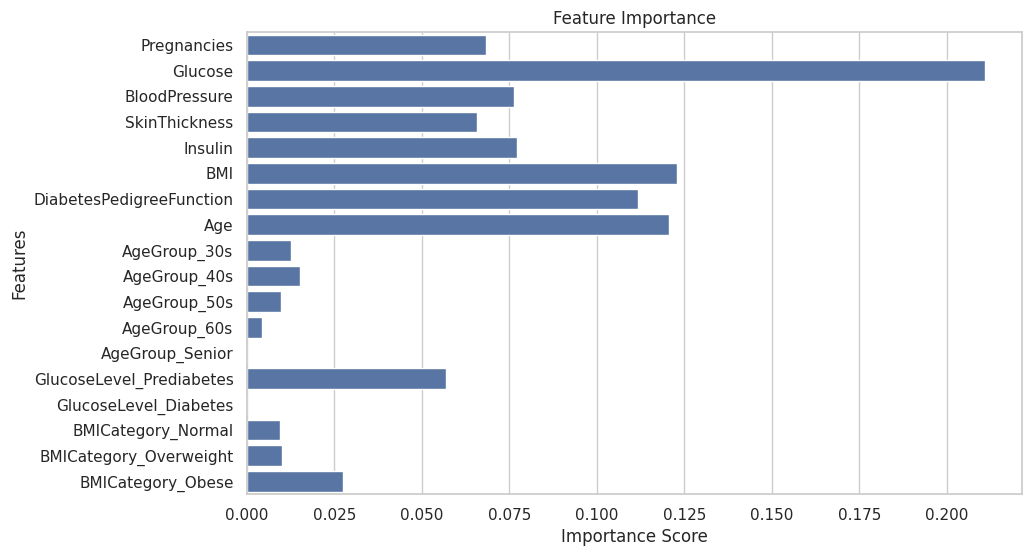

In [ ]:
# Feature Importance
feature_importances = model.feature_importances_
features = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

🎉 Congratulations on completing the exploration of the Diabetes dataset! 🎊 We’ve covered essential techniques in data analysis and visualization, providing a solid foundation for your data science journey.

If you're interested in learning about machine learning, just let me know, and I can create more tutorials for that.

Feel free to adjust any part of it to match your style further!